In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

!pip install category_encoders
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_validate, GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import RANSACRegressor, SGDRegressor,TheilSenRegressor,HuberRegressor,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import category_encoders as ce
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 85.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 104.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 57.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 133.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 55.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 kB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 2

![Ocean](ocean.png "Ocean")

In [2]:
df = pd.read_csv('./data/abalone.csv')

# INTRODUCTION
***The Abalone Company*** is an abalone farming operation in Japan. For operational and environmental reasons, it is important to provide age estimates when abalones go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. However, this method can be cumbersome. For this reason, a new method of estimating age using physical characteristics is needed.

# THE DATA
The data is drawn from a study published by Nash et al., (1994). Samples were taken from 5 areas within Tasmania and Bass Strait from May 31st to June 2nd, 1988. The 5 areas were; Hogan Islands, Kent Islands, Babel Island, Cape Barren Island and Waterhouse Island. The sample consisted of Blacklip abalone, and a small number of Greenlip abalone. Both abalone out in the open or hidden were collected <a href="#footnote-1">[1]</a>.

The data has been pre-processed prior to the current analysis in the following manner: 

> “examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200)<a href="#footnote-2">[2]</a>


Our variables of interest are:

In [3]:
variablesofinterest= pd.DataFrame({'Name': ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
                                            'Viscera Weight', 'Shell Weight', 'Rings', 'Age'],
                                  'Scale':['M,F,I','Millimeters','Millimeters','Millimeters','Grams','Grams',
                                           'Grams','Grams', 'Count', 'Year'],
                                   'Description':['Sex','Longest shell measurement','Perpendicular to length',
                                                  'With meat in shell',
                                                  'Whole abalone','Weight of meat','Gut weight (after bleeding)',
                                                  'After being dried','count of rings +1.5:** Gives the age in years',
                                                  'Gives the age in years']}).set_index('Name')
variablesofinterest

,Scale,Description
Name,,
Sex,"M,F,I",Sex
Length,Millimeters,Longest shell measurement
Diameter,Millimeters,Perpendicular to length
Height,Millimeters,With meat in shell
Whole Weight,Grams,Whole abalone
Shucked Weight,Grams,Weight of meat
Viscera Weight,Grams,Gut weight (after bleeding)
Shell Weight,Grams,After being dried
Rings,Count,count of rings +1.5:** Gives the age in years


## Sex

It is strange that ‘infant’ is included as a category for 'sex'. To investigate this, we will first turn to the original study from which the data is drawn. 

According to the paper (p.31), the abalone marked as ‘I” are 'immature'. Maturation occurs over a number of years and is dependent on location. Blacklip abalone mature at a shell length of about 9-10cm(or about 3-6 years old). Greenlip abalone, on the other hand, mature at a shell lenght of about 8-9cm (or about 3 years old). 

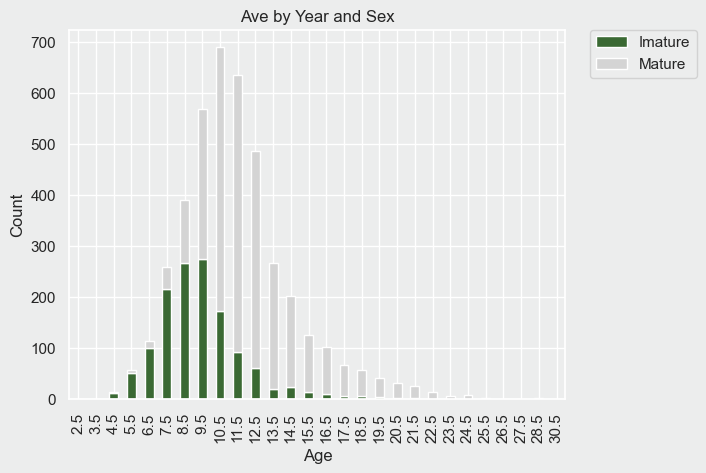

In [4]:
# defining plot style
plt.style.use('ggplot')
sns.set(rc={'axes.facecolor':'#ECEDED', 'figure.facecolor':'#ECEDED'})

# Selecting relivant features
df_sex_test=df[['sex','age']]

# Creature categories 'mature' and 'immature'
df_sex_test['sex']=np.where(df_sex_test['sex']=='F','Mature',df_sex_test['sex'])
df_sex_test['sex']=np.where(df_sex_test['sex']=='M','Mature',df_sex_test['sex'])
df_sex_test['sex']=np.where(df_sex_test['sex']=='I','Imature',df_sex_test['sex'])

#plotting
pallet={"Mature":"#d4d4d4", "Imature":"#3a6933" }
df_sex_test.groupby(['age','sex']).sex.count().unstack().plot.bar(stacked=True, color=pallet)

# titles
plt.xlabel('Age') 
plt.ylabel('Count')   
plt.title("Ave by Year and Sex")
#plt.legend([],[], frameon=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

From the graph above, we can see that maturation in our sample begins at 4.5 years of age and continues until 19.5 years of age.

## Outliers
In exploring these data, continuous variables were converted back to the original scale, this is done to assess possible outliers (existing research about abalone references measurements in millimeters). 

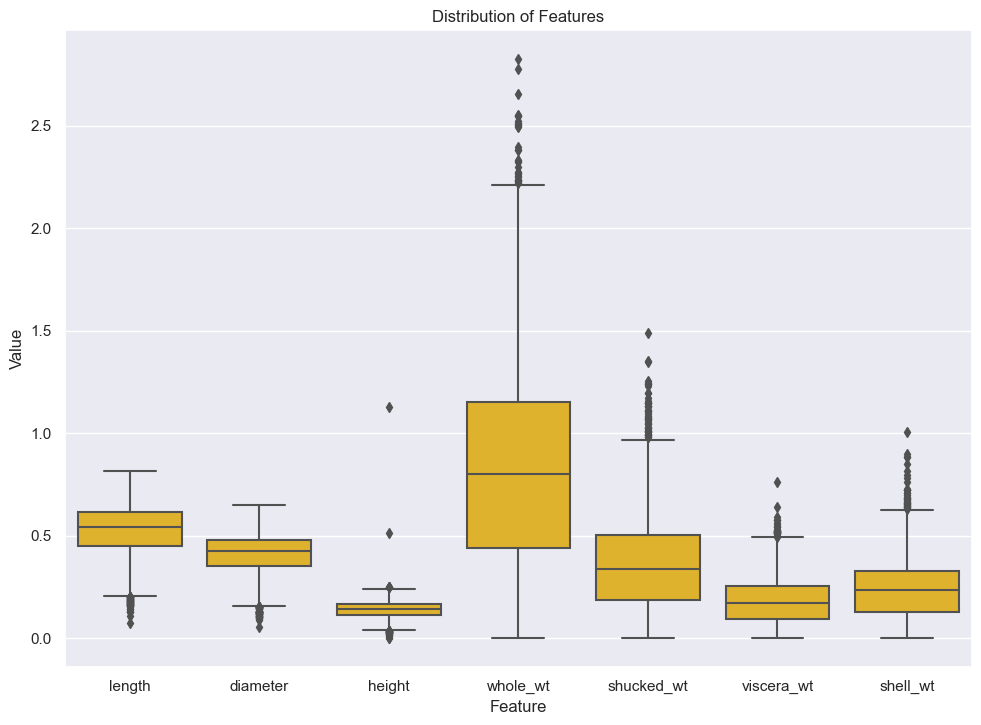

In [5]:
# reshape dataframe
df_features = df[['length', 'diameter', 'height', 'whole_wt', 'shucked_wt','viscera_wt', 'shell_wt']]
I3 = df_features.stack().reset_index(level=1).reset_index(drop=True).rename(columns={'level_1': 'Name', 0: 'Value'})
I3['Value'] = I3['Value'].astype(float)

#defining style
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette={'#fdc010' }

#plotting
sns.boxplot(x='Name', y='Value', data=I3,palette=palette)

# titles
plt.xlabel('Feature') 
plt.ylabel('Value')   
plt.title("Distribution of Features")
plt.legend([],[], frameon=False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The box plots abouve reveal the presence of several outliers present in all features. lets explore this further in a summary table

In [6]:
# Converting numerical features back to original scale
col=['length', 'diameter', 'height', 'whole_wt', 'shucked_wt',
       'viscera_wt', 'shell_wt'] # selecting relivant features

# multiplying all columns by 200
for element in col:
    df[element]=df[element]*200
    
df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,104.798420,81.576251,27.903280,165.748432,71.873498,36.118722,47.766172,9.933684,11.433684
std,24.018583,19.847973,8.365411,98.077804,44.392590,21.922850,27.840534,3.224169,3.224169
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000,2.500000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.700000,26.000000,8.000000,9.500000
50%,109.000000,85.000000,28.000000,159.900000,67.200000,34.200000,46.800000,9.000000,10.500000
75%,123.000000,96.000000,33.000000,230.600000,100.400000,50.600000,65.800000,11.000000,12.500000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000,30.500000


We can see that most of these extreme values are within the normal expations of abalones and are thus, unlikely to due to mistakes in data entry. However, the variable 'height' presents us with a problem. The minimum value for height is recorded as 0.00. This is unlikly to be true. Lets check how many abalones were recorded as being 0mm tall.

In [7]:
len(df[df.height ==0])

2

Since there are only 2 entryes, we can comfortable drop these values from the analysis.

In [8]:
df = df.drop(df[df.height ==0].index)

## Age

Lets turn now to our target variable, age. The distribution of age is plotted below as a histogram on the left and an ECDF on the right. We can see that the majority of abalone in our sample are 10.5-12.5 years old. 

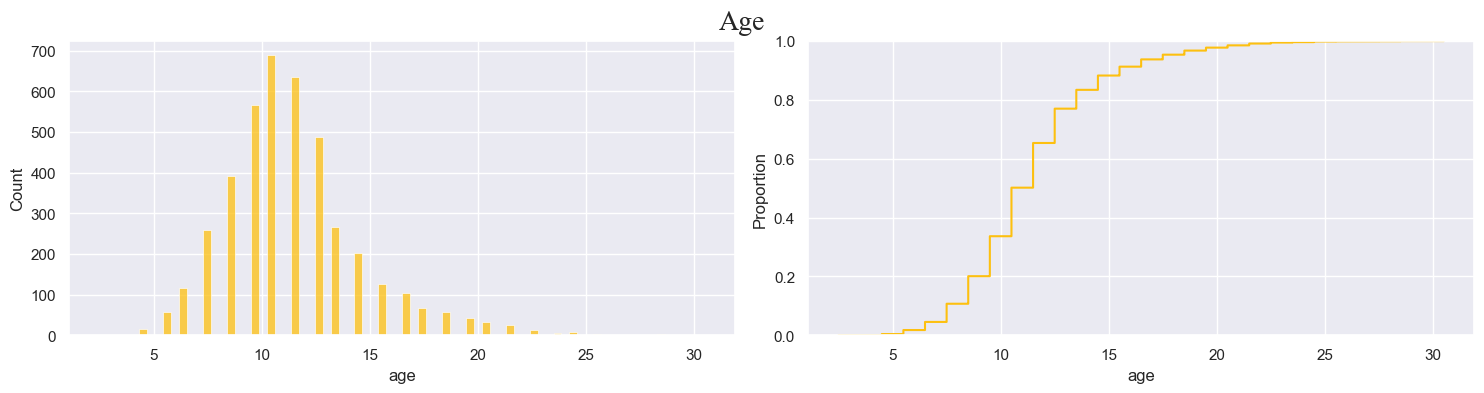

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

sns.ecdfplot(data=df, x="age",color='#fdc010', ax=ax2)
sns.histplot(data=df, x="age",color='#fdc010', ax=ax1)

plt.tight_layout()
fig.subplots_adjust(top=0.9) # adjust the Figure in rp
fig.suptitle('Age', fontsize=20, fontfamily='Times New Roman')
plt.show()

Moving forward, abalones over 12.5 years of age will be dropped from the analysis this was done because:

1) The Abalone Company is an abalone farming operation. Abalone are hatched on the farm and raised until they are market ready (this is in contrast with wild-caught abalone which could be of any age), thus predicting the age of relatively young abalone (average age of abalone that go to the market is 3 to 4 years) is particularly important.
2) Older abalone included in the dataset might be peculiar in some way. For instance, Abalone that survived to older ages may be abnormally large, since smaller abalone would be easier targets for prey [3]. Thus, the characteristics of such abalone may not accurately reflect how an abalone's characteristics changes as it ages - especially in a farm which is a more controlled environment.
    
A cut off value of 12.5 was chosen because it will allow us to retain a sufficient sample size from which we can analyse the relevant subsection of the data.  

In [10]:
print('The sample size of the retained data is:',len(df[df.age <12.5]))

The sample size of the retained data is: 2728


# ANALYSIS

## Question 1: How does weight change with age for each of the three sex categories?

Growth rates can be highly variable between individual abalone since growth rates are contingent upon a myriad of factors (including genotype, feed, water quality etc.).<a href="#footnote-3">[4]</a>. 

Because these factors are not included in the dataset, there is an element of uncertainty in our estimates of how weight changes with age. It is also important to note that conclusions about growth rates can not be drawn since data about how individual abalones change over time is not included. However, we will attempt to draw conclusions about the average growth trajectory of abalones.

Lets first consider the abalone's total weight. From the graph below, we can see that weight increases rapidly during the fist few years of life before tapering off by 12.5 years of age. As age increases, both the average weight and the spread of the data increase.

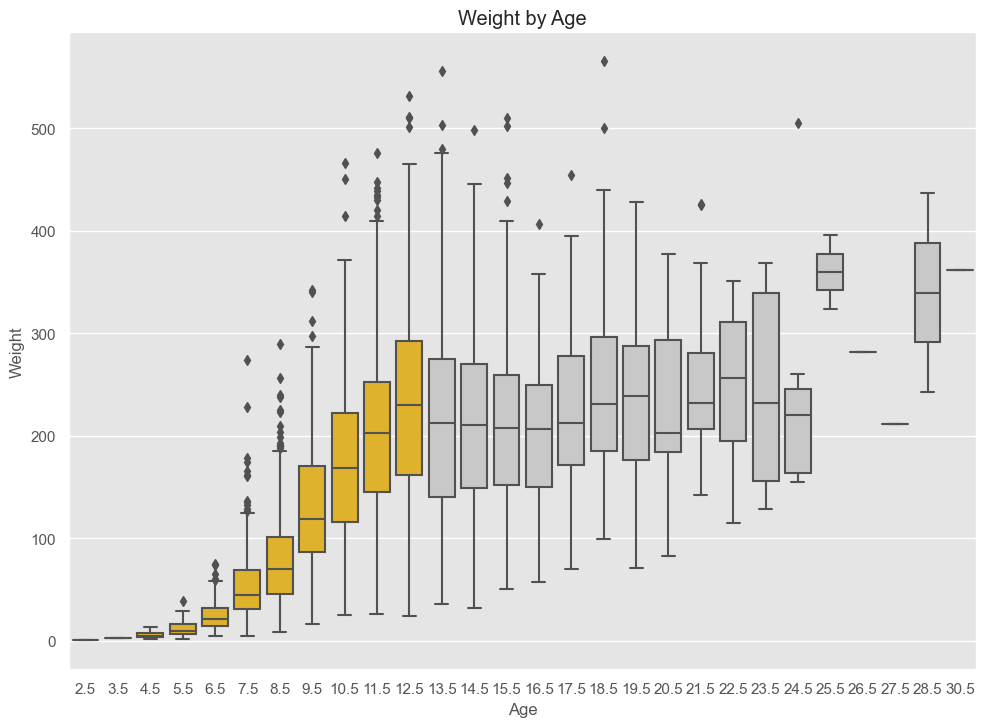

In [11]:
palette={2.5:'#fdc010',3.5:'#fdc010',4.5:'#fdc010',
        5.5:'#fdc010',6.5:'#fdc010',7.5:'#fdc010',
        8.5:'#fdc010',9.5:'#fdc010',10.5:'#fdc010',
        11.5:'#fdc010',12.5:'#fdc010',
        13.5:'#C8C8C8',
        14.5:'#C8C8C8',15.5:'#C8C8C8',16.5:'#C8C8C8',
        17.5:'#C8C8C8',18.5:'#C8C8C8',19.5:'#C8C8C8',
        20.5:'#C8C8C8',21.5:'#C8C8C8',22.5:'#C8C8C8',
        23.5:'#C8C8C8',24.5:'#C8C8C8',25.5:'#C8C8C8',
         26.5:'#C8C8C8',27.5:'#C8C8C8',28.5:'#C8C8C8',
        29.5:'#C8C8C8',30.5:'#C8C8C8'}

plt.style.use('ggplot')
sns.boxplot(x='age', y='whole_wt', data=df, hue='age',palette=palette, dodge=False)

# titles
plt.xlabel('Age') 
plt.ylabel('Weight')   
plt.title("Weight by Age")
plt.legend([],[], frameon=False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

When we condider how the average weight at each age group is changing, an exponental phase (at aroung ages 2.5-12.5) and pleateau phase ( at around 12.5+) is identifiable.

Since I am only considering abalone under 12.5 years of age, we can fit a curve to our data to determine the approximate relationship between average weight and age. To do that curve_fit from scipy.optimize will be used.

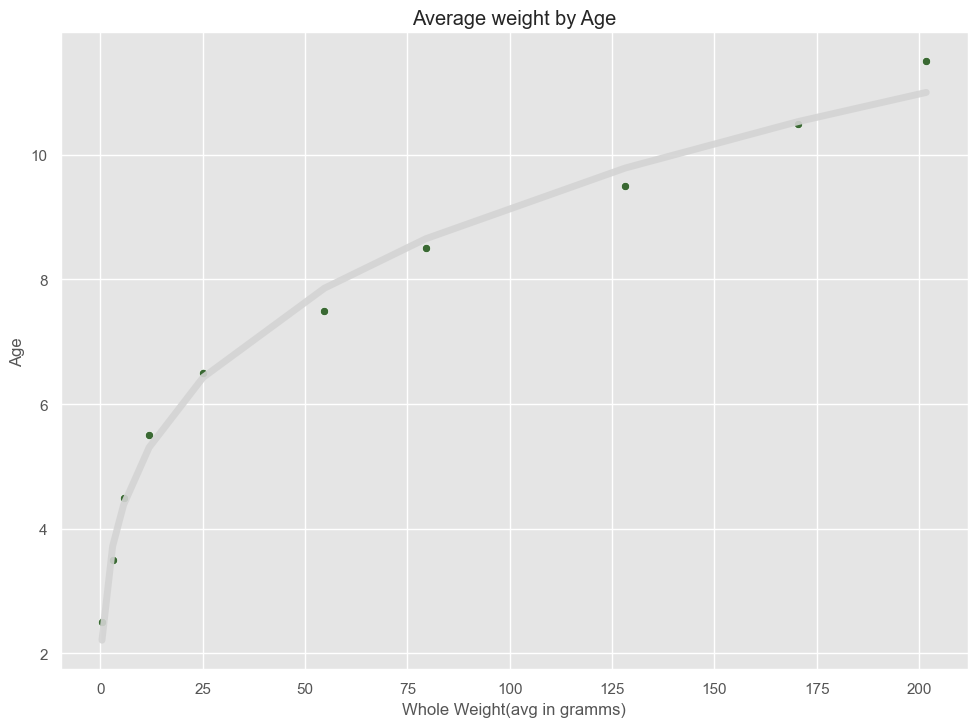

In [12]:
from scipy.optimize import curve_fit

# Function to calculate the exponential with constants a and b
def exponential(x, a, b):
    return a*x**b

a_w= df[df['age']<=12]
avg_by_age = a_w.groupby('age')['whole_wt'].mean().reset_index()

data = avg_by_age

x_fitted = data['whole_wt']
y_fitted = data['age']

pars, cov = curve_fit(f=exponential, 
                      xdata= x_fitted, 
                      ydata= y_fitted, 
                      p0=[0, 0],
                      bounds=(-np.inf, np.inf))

# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))

# Calculate the residuals
res = y_fitted - exponential(x_fitted, *pars)

#plotting
data['age_test']= pars[0]*data['whole_wt']**pars[1]

sns.scatterplot(x='whole_wt', y='age', data=data, color='#3a6933')
sns.lineplot(x='whole_wt',y='age_test', color='#d4d4d4', linewidth=5, alpha= 0.9, data=data)

# titles
plt.xlabel('Whole Weight(avg in gramms)') 
plt.ylabel('Age')   
plt.title("Average weight by Age")
plt.legend([],[], frameon=False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The relationship between average weight and age (for abalone under 12.5 years of age) can be modeled as follows;

$$ \large Age = 2.80 \times Weight^{0.26}$$

Now that we know how total weight changes over the life time of an albalone, lets turn to the other measures. 

Along with total weight, there are 3 additional measures of weight. These are; 1) Shucked weight, 2) Viscera weight and 3) Shell weight. As expected, these measures are all highly correlated… 

In [13]:
weight_corr_test=df[['whole_wt', 'shucked_wt','viscera_wt', 'shell_wt']]
weight_corr_test.corr()

,whole_wt,shucked_wt,viscera_wt,shell_wt
whole_wt,1.000000,0.969389,0.966354,0.955924
shucked_wt,0.969389,1.000000,0.931924,0.883129
viscera_wt,0.966354,0.931924,1.000000,0.908186
shell_wt,0.955924,0.883129,0.908186,1.000000


Shucked weight is particularly important for market value (larger abalone sell for higher prices). So we will explore this next. 

The graph below shows how sex influences the weight/age relationship. Sexually immature albalones tend to reach lower average weights compared to their sexually matured counterparts. Females tend to weight more then males until around 11 years of age before the average weight of males and females converge.

The youngest female in the dataset is around 6.5 years of age while the youngest male is about 4.5 years of age. As mentioned previously abalones mature starting at around 3 years of age, so our predictions for males growth trajectory may be more accuracte than that of females - I can not make conclusions about how females weight changes as they age from 3-6 years old.

In [14]:
female = df[(df['sex'] == 'F') & (df['age'] <= 12.5)]
infant = df[(df['sex'] == 'I') & (df['age'] <= 12.5)]
male = df[(df['sex'] == 'M') & (df['age'] <= 12.5)]

print('Number of females in the dataset',len(female))
print('Number of infant in the dataset',len(infant))
print('Number of males in the dataset',len(male))

Number of females in the dataset 872
Number of infant in the dataset 1247
Number of males in the dataset 1096


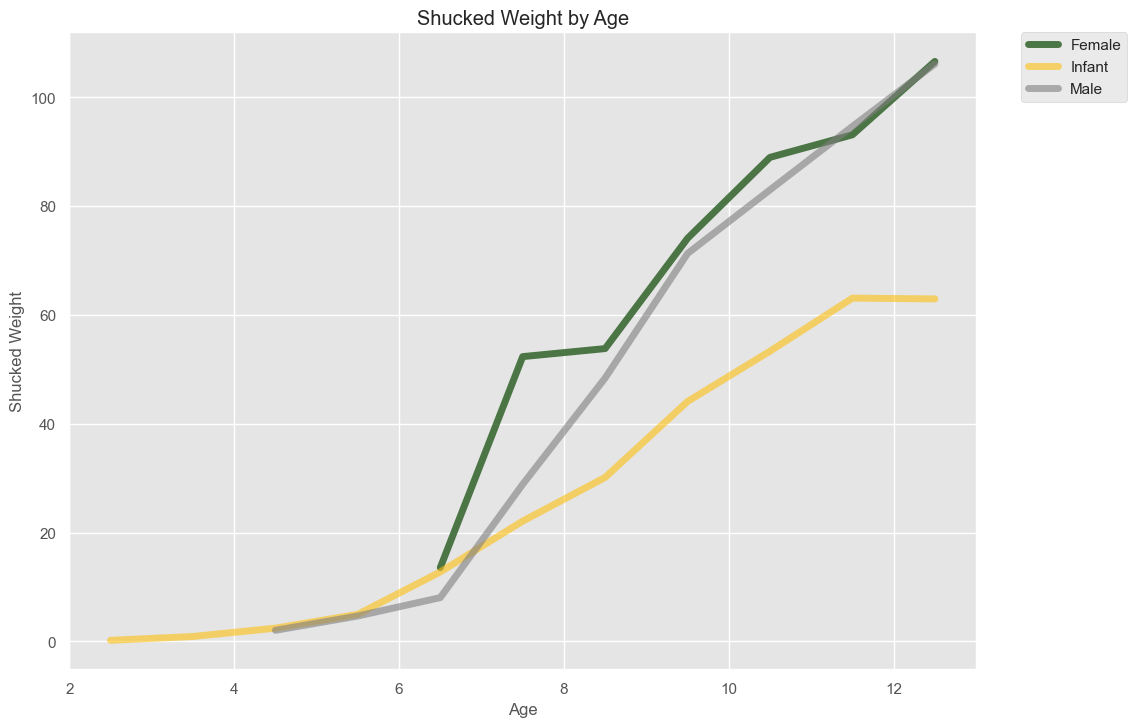

In [15]:
# Prepairing Variables
avg_female = female.groupby('age')['shucked_wt',].mean().reset_index()
avg_infant = infant.groupby('age')['shucked_wt',].mean().reset_index()
avg_male = male.groupby('age')['shucked_wt',].mean().reset_index()

# Plotting All Variabeles on Plot

#---Female
plt.plot('age','shucked_wt',data=avg_female, 
         linestyle='solid',linewidth=5,color='#3a6933',label='Female', alpha=0.9)
# -- Infant
plt.plot('age','shucked_wt',data=avg_infant, 
         linestyle='solid',linewidth=5,color='#fdc010',label='Infant',alpha=0.6)
# -- Male
plt.plot('age','shucked_wt', data=avg_male,
          linestyle='solid', linewidth=5,color='#7f7f7f',label='Male',alpha=0.6)

plt.legend()
# titles
plt.xlabel('Age') 
plt.ylabel('Shucked Weight')   
plt.title("Shucked Weight by Age")
#plt.legend([],[], frameon=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Now that we have a general understanding of how the average shucked weight changes over age, lets consider the full range of values.

Text(0.5, 0.98, 'Weight vs. Age by Sex')

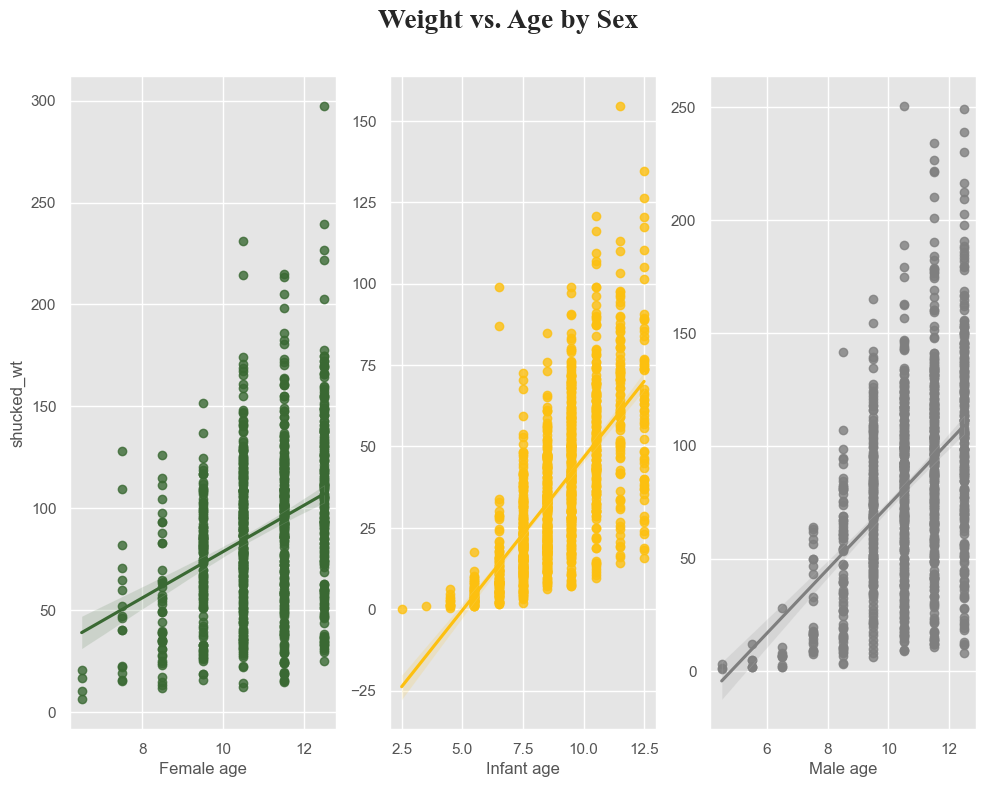

In [16]:
import scipy as sp

fig, axs = plt.subplots(ncols=3)

# --- Plot 1: FEMALE
g1=sns.regplot(x='age',y='shucked_wt',data=female,color='#3a6933', ax=axs[0])
g1.set(xlabel='Female age')  

# --- Plot 2: INFANT
g2=sns.regplot(x='age',y='shucked_wt',data=infant, color='#fdc010', ax=axs[1])
g2.set(xlabel='Infant age')  
g2.set(ylabel=None)  

# --- Plot 3: MALE
g3=sns.regplot(x='age',y='shucked_wt',data=male, color='#7f7f7f', ax=axs[2])
g3.set(xlabel='Male age')
g3.set(ylabel=None)  

fig.subplots_adjust(top=0.9) # adjust the Figure in rp
fig.suptitle('Weight vs. Age by Sex', fontsize=20, fontfamily='Times New Roman', fontweight='bold')
#fig.set_titles(col_template="{col_name}", row_template="{row_name}")

In regards to trends in these data, we see that males achieve higher weights than females and infants. Infants achieve lower weights as compared to females and males.

Overall, we can see that there appears to be a positive association between age and shucked weight for each of the sexes.

The average weight increases as age increases, however,the spread of the data also increases for all sexes. This makes it difficult to determine and abalone’s age by referring to its weight (the adjusted R2 values for infants, females and males were 0.467,0.125, and 0.217 respectively, see below for more detail). So we see only a weak linear relationship between the two variables (which is to be expected from looking at the abouve plots).

In [17]:
fig_I = px.scatter(infant, x='age',y='shucked_wt',trendline="ols")
results_I = px.get_trendline_results(fig_I)
print('Infant',results_I.px_fit_results.iloc[0].summary())

fig_F = px.scatter(female, x='age',y='shucked_wt',trendline="ols")
results_F = px.get_trendline_results(fig_F)
print('Female', results_F.px_fit_results.iloc[0].summary())

fig_M = px.scatter(male, x='age',y='shucked_wt',trendline="ols")
results_M = px.get_trendline_results(fig_M)
print('Male', results_M.px_fit_results.iloc[0].summary())

Infant                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1065.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          2.67e-169
Time:                        08:13:35   Log-Likelihood:                -5368.7
No. Observations:                1247   AIC:                         1.074e+04
Df Residuals:                    1245   BIC:                         1.075e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.2462      2.611    -18.092  

## Question2: Can you estimate an abalone's age using its physical characteristics

I will now use machine learning techniques in order to estimate an abalone's age based on its physical characteristics.

In modeling these data several new features were created. Including:
- 'dia_height': Diameter of the shell divided by the weight of the shell
- 'shucked_whole': Shucked weight divided by whole weight
- 'shell_whole': The weight of the shell divided by the whole weight
- 'viscera_shucked': Viscera weight divided by the shucked weight
- 'shell_shucked': Shell weight divided by shucked weight
- 'viscera_shell': Viscera weight divided by shell weight
- 'Shell_Area': The area of the shell
- 'Volume': Shell area divided by height 
- 'Shell_to_volume': The area of the shell divided by the volume
- 'weight_shell': The weight of the shell divided by volume 
- 'weight_area’: She weight of the shell divided by the shell area
- 'shell_meat' : Shucked weight divided by shell weight


In [18]:
df = pd.read_csv('./data/abalone.csv') # re-load data, it is not pre-processed as per the original dataset
df['dia_height']=df['diameter']/df['shell_wt']
df['shucked_whole']=df['shucked_wt']/df['whole_wt']
df['shell_whole']=df['shell_wt']/df['whole_wt']
df['viscera_shucked']=df['viscera_wt']/df['shucked_wt']
df['shell_shucked']=df['shell_wt']/df['shucked_wt']
df['viscera_shell']=df['viscera_wt']/df['shell_wt']
df['Shell_Area']=(df['length']/2)*(df['diameter']/2)*np.pi
df['Volume']=df['Shell_Area']**df['height']
df['Shell_to_volume']=df['Shell_Area']/df['Volume']
df['weight_shell']=df['shell_wt']/df['Volume']
df['weight_area']=df['shell_wt']/df['Shell_Area']
df['shell_meat'] = df['shucked_wt']/df['shell_wt']

Three models (Random Forest Regressor, Ada Boost Regressor and RANSAC Regressor) were tested using a nested cross validation approach. 

Nested cross validation helps to prevent overfitting while tuning hyperparameters and will be used to identify the best performing model. The MSE and RMSE, will be my main performance metrics.

In [19]:
encoder = ce.OneHotEncoder(handle_missing='value',handle_unknown='value',use_cat_names=True)

data =df[df['age'] <=12.5]
X0=data[['length', 'diameter', 'height', 'shucked_wt', 
        'sex', 'dia_height','shucked_whole', 'shell_whole', 
        'viscera_shucked', 'shell_shucked', 'viscera_shell','Shell_Area', 
        'Volume', 'Shell_to_volume', 'weight_shell','weight_area',
        'shell_meat']]
X_enc= encoder.fit_transform(X0)
y=data[['age']]

X=np.array(X_enc)
y=np.array(y)

# Defining each Model
rm=RandomForestRegressor() 
ABC = AdaBoostRegressor()
ransac = RANSACRegressor()

#--------------- Defining the cross_validation function
def CrossValidate(model, print_model=False):
    cv = cross_validate(model, X, y, 
                        scoring= ('neg_root_mean_squared_error'), 
                        cv=10) 
    scores = ' + '.join(f'{s:.2f}' for s in cv["test_score"])
    mean_ = cv["test_score"].mean()
    msg = f'Cross-validated R2: ({scores}) / 2 = {mean_:.2f}'
    if print_model:
        msg = f'{model}:\n\t{msg}\n'
    print(msg)

In [19]:
#--------------- lr inner loop
ransac_grid = GridSearchCV(RANSACRegressor(random_state=0), 
                       param_grid={'estimator':[LinearRegression(),PolynomialFeatures()],
                                   'min_samples':[1,5,30],
                                   'residual_threshold':[0.01,5,10]
                                  })
print('RANSAC Regressor')
CrossValidate(ransac_grid, print_model=False)
ransac_grid.fit(X, y)
print('The best Parameters are:',ransac_grid.best_params_)


RANSAC Regressor


In [ ]:
#--------------- random forest inner loop
rm_grid = GridSearchCV(RandomForestRegressor(random_state=0), 
                       param_grid={'n_estimators': [1,2,5,6,7,8,9,10,22],
                                   'max_depth':[3,5]})
print('Random Forest')
CrossValidate(rm_grid, print_model=False)
rm_grid.fit(X, y)
print('The best Parameters are:',rm_grid.best_params_)

In [ ]:
#---------------  Ada_grid inner loop
Ada_grid = GridSearchCV(AdaBoostRegressor(random_state=0), 
                        param_grid={'n_estimators': [5,6,7,8,9,10,22], 
                                    'learning_rate':[1.0,5.0,10.0]})
print('Ada Boost Regressor')
CrossValidate(Ada_grid, print_model=False)
Ada_grid.fit(X, y)
print('The best Parameters are:',Ada_grid.best_params_)

In [20]:
import math
results = pd.DataFrame({'Model': ['RANSAC Regressor','Random Forest Regressor','AdaBoost Regressor'],
                       'Cross Validation Results MSE':[1.44, 1.07, 1.12]})
results['RMSE'] = np.sqrt(results['Cross Validation Results MSE'])
results= results.set_index('Model').sort_values('Cross Validation Results MSE',ascending=True).style.highlight_min(color="#fdc010")
results

As seen in the table abouve, Random Forest Regressor (with a maximum depth of 5, and 22 estimators) will be chosen since it has the lowest RMSE. 

The RMSE of 1.03 means that the average deviation between predicted ages and actual ages is 1.03 years. Lets see some examples of how accurate the model's predictions are. 

In the table below, a random sample of 10 actual vs. predicted values are shown. We can see that the model performs relitivley well.

In [21]:
from sklearn.model_selection import train_test_split
import random

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=996)

regr = RandomForestRegressor(max_depth=5,n_estimators=22, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

Performance = pd.DataFrame()
Performance['Predicted Values']= y_pred
Performance['Actual Values']= y_test
Performance

Performance_shuffled = Performance.sample(frac=1)
Performance_shuffled.head(10)

Now lets check how the model performs on younger abalone.The table below displays the actual vs. predicted values for abalone under 5. Again the model performs relitivly well.

In [22]:
Performance[Performance['Actual Values']<=5]

## Question 3: Investigate which variables are better predictors of age for abalones

Inorder to see which variables are better predictors of age for abalones, I will use scikit-learn's Permutation Feature Importance.

scikit-learn defines Permutation feature importance as 
> "the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature".<a href="#footnote-5">[5]</a>

In [23]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X, y, test_size=0.20, random_state=996)

regr_imp = RandomForestRegressor(max_depth=5,n_estimators=22, random_state=0)
regr_imp.fit(X_train_imp, y_train_imp)
y_pred_imp= regr.predict(X_test_imp)

feature_names=['length', 'diameter', 'height', 'shucked_wt', 'sex_M', 'sex_F', 'sex_I',
       'dia_height', 'shucked_whole', 'shell_whole', 'viscera_shucked',
       'shell_shucked', 'viscera_shell', 'Shell_Area', 'Volume',
       'Shell_to_volume', 'weight_shell', 'weight_area', 'shell_meat']

# --- Fit on test data
result_test = permutation_importance(regr_imp, X_test_imp, y_test_imp, n_repeats=10,
                                     random_state=42, n_jobs=2)
forest_importances_test = pd.Series(result_test.importances_mean, index=feature_names)

# --- Fit on train data
result_train = permutation_importance(regr_imp, X_train_imp, y_train_imp, n_repeats=10, 
                                      random_state=42, n_jobs=2)
forest_importances_train = pd.Series(result_train.importances_mean, index=feature_names)

# --- Converting to pd dataframe to easily graph
forest_importances_train = pd.DataFrame(forest_importances_train).rename(columns={0: "Score_train"})
forest_importances_test = pd.DataFrame(forest_importances_test).rename(columns={0: "Score_test"})
importances = forest_importances_train.join(forest_importances_test)

# --- Plotting
plt.style.use('ggplot')

palette= {'Score_train': '#7f7f7f', 'Score_test': '#fdc010'}

importances.plot(kind='barh',color=palette)

# -- titles
plt.xlabel('Value') 
plt.ylabel('Feature')   
plt.title("Feature Importance Train vs. Test")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

importance is similar between training and test datasets. This is good news and suggests that there is no problem with overfitting. We can reasonably conclude that the most important features are;

- 'weight_area’: She weight of the shell divided by the shell area
- 'weight_shell': The weight of the shell divided by volume 
- 'dia_height': Diameter of the shell divided by the weight of the shell

# CONCLUSION

The Random Forest Regressor can predict an abalone's age with an average deviation between predicted ages and actual ages is 1.03 years. The shell weight of the shell divided by the shell area, the weight of the shell divided by volume and the diameter of the shell divided by the weight of the shell are the most important features for the model in predicting the age of an abalone.

#### Limitations
1) These data are relating to wild abalone. The extent to which these can be representative of farmed abalone should be assessed in the future.

2) We don’t have information pertaining to the species of abalone (the data contained samples from Greenlip and Blacklip abalone), or data relating to the location at which these abalone were caught. Theses may be a confounding variables in the analysis.

-------------------------------------------------------------------------------------------------------------------------------------
<p id="footnote-1">[1] Nash et al., (1994) Avalible: https://www.researchgate.net/profile/Warwick-Nash/publication/287546509_7he_Population_Biology_of_Abalone_Haliotis_species_in_Tasmania_I_Blacklip_Abalone_H_rubra_from_the_North_Coast_and_Islands_of_Bass_Strait/links/5d949460458515202b7bf592/7he-Population-Biology-of-Abalone-Haliotis-species-in-Tasmania-I-Blacklip-Abalone-H-rubra-from-the-North-Coast-and-Islands-of-Bass-Strait.pdf</p>
<p id="footnote-2">[2] Machine Learning Repository available: https://archive.ics.uci.edu/ml/datasets/abalone</p>
<p id="footnote-3">[3]https://www.fao.org/3/AB731E/AB731E01.htm</p>
<p id="footnote-3">[4] https://www.fish.wa.gov.au/Documents/research_reports/frr128.pdf</p>
<p id="footnote-3">[5] https://scikit-learn.org/stable/modules/permutation_importance.html#:~:text=The%20permutation%20feature%20importance%20is,model%20depends%20on%20the%20feature</p>

# APPENDIX


For fun, lets visualize how the random forest algorithm works. This function generates a GraphViz representation of the decision tree.

The code is displayed below commented out in case it interferes with publishing.

In [25]:
from sklearn.tree import export_graphviz

# Extract single tree
estimator = regr_imp.estimators_[0]

# Export as dot file
#export_graphviz(estimator, out_file='tree.dot', 
#                feature_names = ['length', 'diameter', 'height', 'shucked_wt', 'sex_M', 'sex_F', 'sex_I',
#                                 'dia_height', 'shucked_whole', 'shell_whole', 'viscera_shucked',
#                                 'shell_shucked', 'viscera_shell', 'Shell_Area', 'Volume',
#                                 'Shell_to_volume', 'weight_shell', 'weight_area', 'shell_meat'],
#                class_names = df['age'],
#                rounded = True, proportion = False, 
#                precision = 2, filled = False)

# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')